In [86]:
import os
import sys
#import hic
#import utilities
import pandas as pd
import numpy as np
import xarray as xr
#import plasma
#import plasma_interaction as pi
#import jets
#import config
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.interpolate as interpolate
import numpy.random as rn
from scipy import integrate
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expi

import scipy.optimize as optimize
import fnmatch
# import lhapdf

%matplotlib inline
%config InlineBackend.figure_format='png'
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'Helvetica'

## v2 Selection Cuts

In [87]:

# direc = '2024.08.03_acoplanarities'
# filelist = os.listdir(direc)

# results = pd.DataFrame({})
# for file in filelist:
#     print(file)
#     currentfile = pd.read_parquet(direc + '\\' + file)
#     results = pd.concat([results, currentfile])


In [88]:
v2results = pd.read_parquet('2024.08.03_acoplanarities\\partonic_hard_v2_dist.parquet')

In [89]:
v2results

,delta_v_2_hard,v_2_hard,v_2_hard_el,mult,Tmax,e_2,v_2_soft
index,,,,,,,
0,0.000401,0.009681,0.009280,0.422367,0.169434,0.197283,0.034173
1,-0.165775,-0.105329,0.060446,3612.519489,0.567813,0.054870,0.010224
2,0.120505,0.128056,0.007551,1196.372821,0.515834,0.448477,0.129014
3,0.028350,0.030475,0.002125,35.429145,0.327165,0.402214,0.054994
4,0.101077,0.112675,0.011598,79.053864,0.374367,0.439969,0.075464
...,...,...,...,...,...,...,...
495,0.115586,0.129777,0.014191,179.216861,0.398569,0.711851,0.164501
496,0.110289,0.125470,0.015182,2853.116584,0.580300,0.149692,0.041247
497,0.113486,0.114722,0.001236,719.886179,0.494847,0.448559,0.108089


In [90]:
#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)



<Axes: >

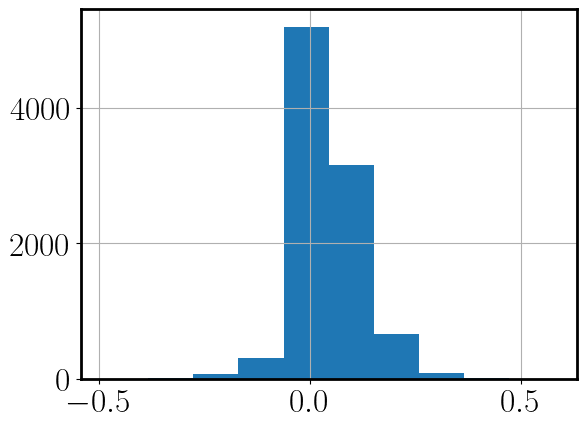

In [14]:
v2results['delta_v_2_hard'].hist() #[v2results['K_F_DRIFT'] == 0.75]

<Axes: >

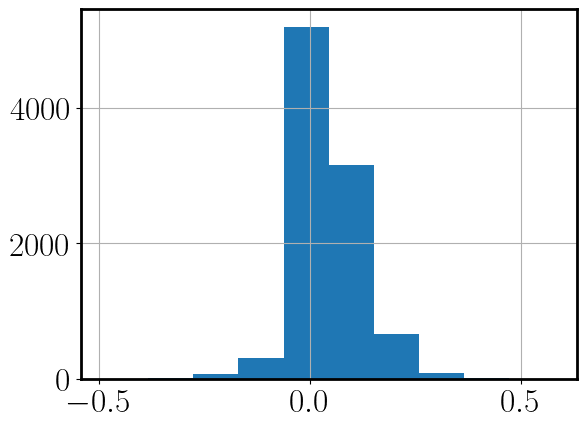

In [16]:
v2results['delta_v_2_hard'].hist()

In [91]:
df = v2results

In [92]:
######################
# Centrality Binning #
######################
'''
Binning the data according to multiplicity bins to mimic experimental "centrality".
'''
print('Binning by centrality')
# Bin by centrality using percentile bounds on multiplicity
# Create percentile bounds using partonic data
# -- partonic data should have constant number of entries per event, so
# -- no need for craziness
# Apply label series to each entry

cent_bins = np.array(['90-100', '80-90', '70-80', '60-70', '50-60',
                      '40-50', '30-40', '20-30', '10-20', '0-10'])
q_bins = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# cent_bins = np.array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', 
#                       '60-70', '70-80', '80-90', '90-100'])
# q_bins = np.array([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0])

cents, mult_bins = pd.qcut(df['mult'], q=q_bins, labels=cent_bins, retbins=True)
df['cent'] = cents
print('done')
# def = aco
# df = v2_df


Binning by centrality
done


In [116]:
v2results

,delta_v_2_hard,v_2_hard,v_2_hard_el,mult,Tmax,e_2,v_2_soft,cent
index,,,,,,,,
0,0.000401,0.009681,0.009280,0.422367,0.169434,0.197283,0.034173,90-100
1,-0.165775,-0.105329,0.060446,3612.519489,0.567813,0.054870,0.010224,0-10
2,0.120505,0.128056,0.007551,1196.372821,0.515834,0.448477,0.129014,20-30
3,0.028350,0.030475,0.002125,35.429145,0.327165,0.402214,0.054994,70-80
4,0.101077,0.112675,0.011598,79.053864,0.374367,0.439969,0.075464,60-70
...,...,...,...,...,...,...,...,...
495,0.115586,0.129777,0.014191,179.216861,0.398569,0.711851,0.164501,50-60
496,0.110289,0.125470,0.015182,2853.116584,0.580300,0.149692,0.041247,0-10
497,0.113486,0.114722,0.001236,719.886179,0.494847,0.448559,0.108089,30-40


Text(0, 0.5, '$\\Delta v_2^{hard}$')

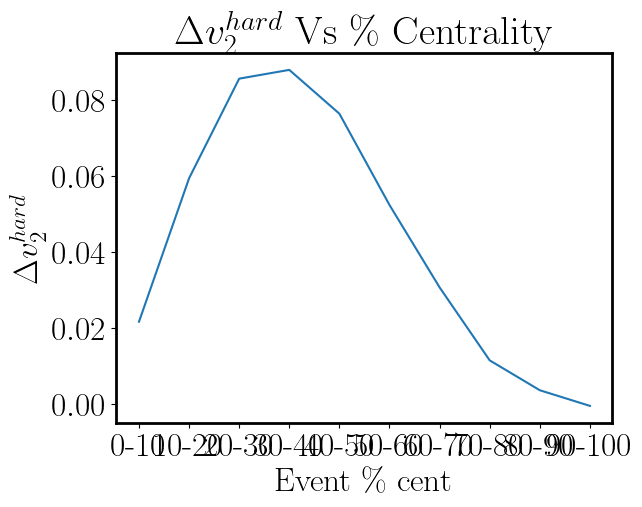

In [94]:
#Aco Vs %cent
cent_labels = np.array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100'])
val_array = np.array([])
for cent in cent_labels:
    df = v2results[(v2results['cent'] == cent)] #& (results['K_F_DRIFT'] == 0.75)]
    val = np.average(df['delta_v_2_hard'])  # ,weights=df['weight']) #v2results['delta_v_2_hard']
    val_array = np.append(val_array, val)
    # do stuff
    #print('{}% : b= {}'.format(cent_10, val))

fig, axis = plt.subplots(1)
axis.plot(cent_labels, val_array)

axis.set_title(r'$\Delta v_2^{hard}$ Vs $\%$ Centrality')
axis.set_xlabel('Event $\%$ cent')
axis.set_ylabel('$\Delta v_2^{hard}$')


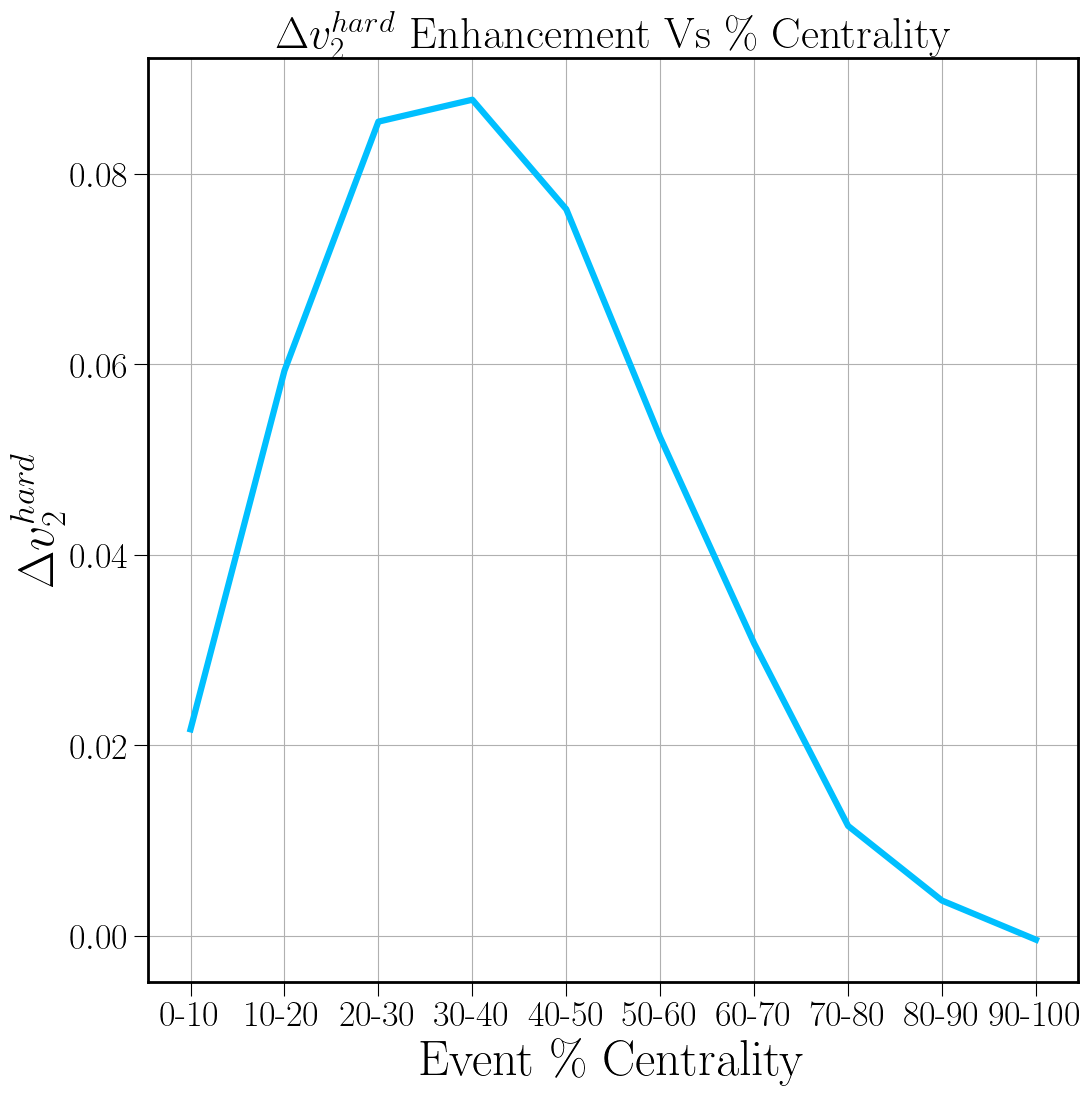

In [126]:
#Acoplanarity = func(%cent) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title(r'$\Delta v_2^{hard}$ Enhancement Vs $\%$ Centrality', fontsize= 32)
ax.set_xlabel('Event $\%$ Centrality', fontsize= 36)
ax.set_ylabel('$\Delta v_2^{hard}$', fontsize= 36)

ax.plot(cent_labels, val_array, linewidth = 4.5, color='deepskyblue') #, label="$T = 0 - 1$ GeV"
# ax.plot(e2_bins, values6, linewidth = 4, color='b', ls= 'dotted', label="$T = 0 - 0.2$ GeV") #
# ax.plot(e2_bins, values7, linewidth = 4, color='orange', ls= 'dashdot', label="$T = 0.2 - 0.4$ GeV") #
# ax.plot(e2_bins, values8, linewidth = 4, color='magenta', ls= 'dashed', label="$T = 0.4 - 0.6$ GeV") #
# ax.plot(e2_bins, values9, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$T = 0.6 - 1$ GeV") #

ax.tick_params(axis='both',which='major',labelsize=26,length=10)
# plt.ylim(0,0.08)
ax.grid()
# ax.legend(fontsize=24)
plt.savefig("v2_enh_unweighted_func_%cent.png", bbox_inches="tight")
# ax.set_xlim(0,500)
# print(T_bins, values)

In [105]:
# v2results.to_parquet('2024.08.03_v2.parquet')

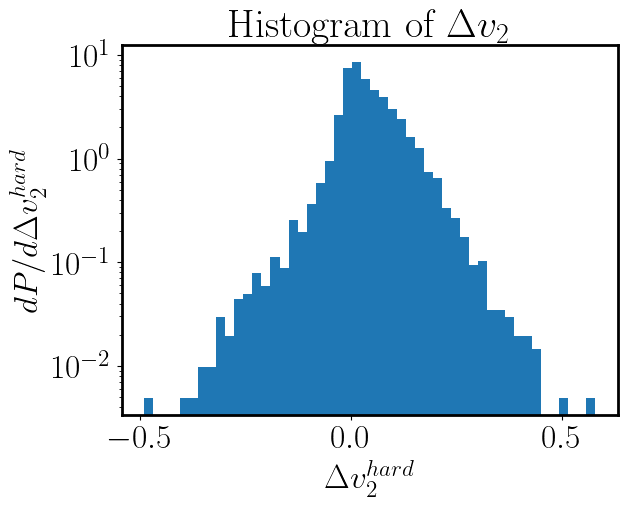

In [127]:
fig, axis = plt.subplots(1,1)
axis.set_title(r'Histogram of $\Delta v_2$') #^{hard}

plt.hist(v2results['delta_v_2_hard'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75] 
plt.yscale('log')
plt.xlabel(r'$\Delta v_2^{hard}$')
plt.ylabel(r'$dP/d\Delta v_2^{hard}$')
plt.savefig("delta_v2_hard_hist.png", bbox_inches="tight")

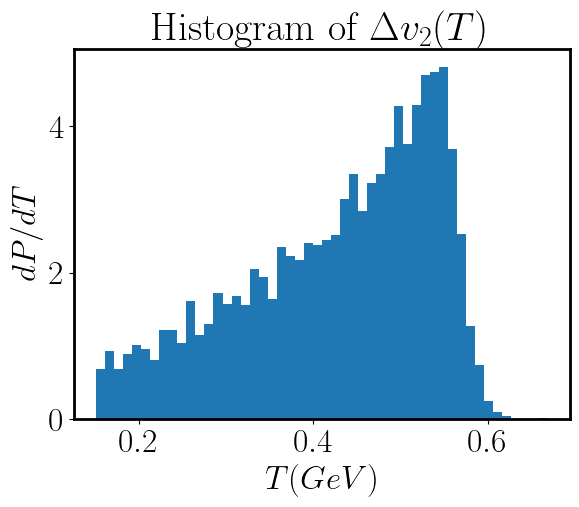

In [128]:
fig, axis = plt.subplots(1)
axis.set_title(r'Histogram of $\Delta v_2 (T)$') #^{hard}
plt.hist(v2results['Tmax'], bins=50, density=True) #[v2results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'$T (GeV)$')
plt.ylabel(r'$dP/dT$') #\Delta v_2^{hard}
plt.savefig("delta_v2_hard_T_hist.png", bbox_inches="tight")

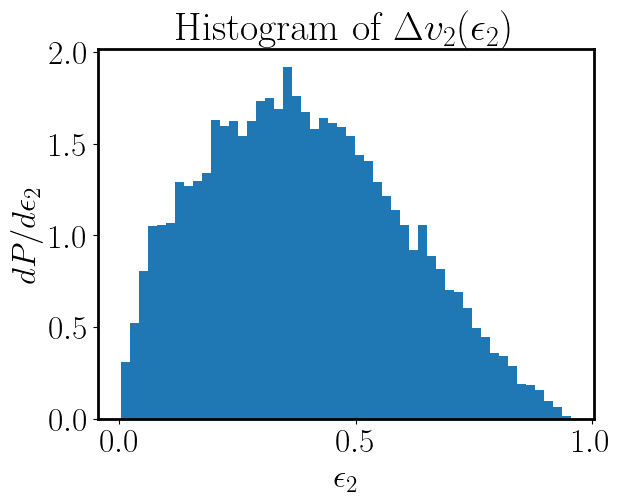

In [129]:
fig, axis = plt.subplots(1)
axis.set_title(r'Histogram of $\Delta v_2 (\epsilon_2)$') #^{hard}
plt.hist(v2results['e_2'], bins=50, density=True)
plt.xlabel(r'$\epsilon_2$')
plt.ylabel(r'$dP/d\epsilon_2$')
plt.savefig("delta_v2_hard_e2_hist.png", bbox_inches="tight")

Text(0, 0.5, '$dP/d(mult)$')

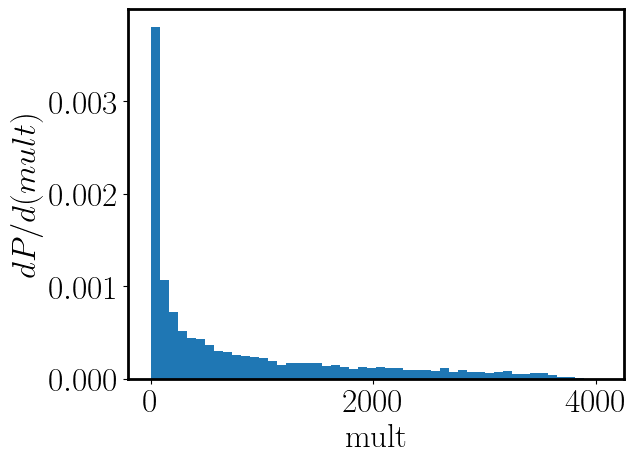

In [43]:
plt.hist(v2results['mult'], bins=50, density=True)
plt.xlabel(r'mult')
plt.ylabel(r'$dP/d(mult)$')

Text(0, 0.5, '$dP/dv_2^{soft}$')

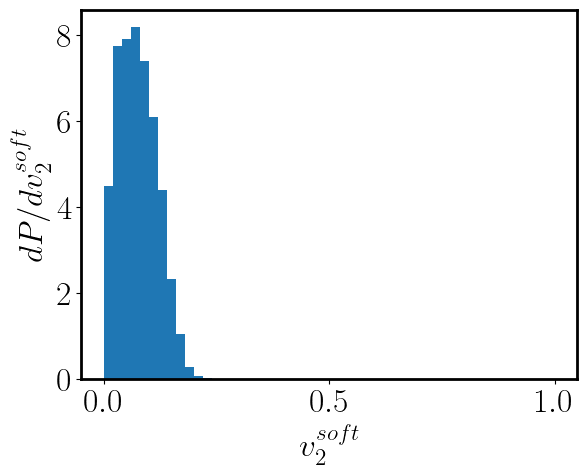

In [45]:
plt.hist(v2results['v_2_soft'], bins=50, density=True) #[results['K_F_DRIFT'] == 0.75]
plt.xlabel(r'$v_2^{soft}$')
plt.ylabel(r'$dP/dv_2^{soft}$')

In [44]:
# plt.hist(results[results['K_F_DRIFT'] == 0.75]['b'], bins=50, density=True)
# plt.xlabel(r'b')
# plt.ylabel(r'$dP/db$')

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99] [        nan         nan         nan         nan         nan -0.00029428
  0.00080122 -0.0009055  -0.00100601  0.00279893  0.0038223   0.01043059
  0.01596525  0.02978402  0.04354219  0.06401756  0.07739027  0.08023419
  0.05819996  0.03679685  0.04943435 -0.00860817  0.00477638         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]


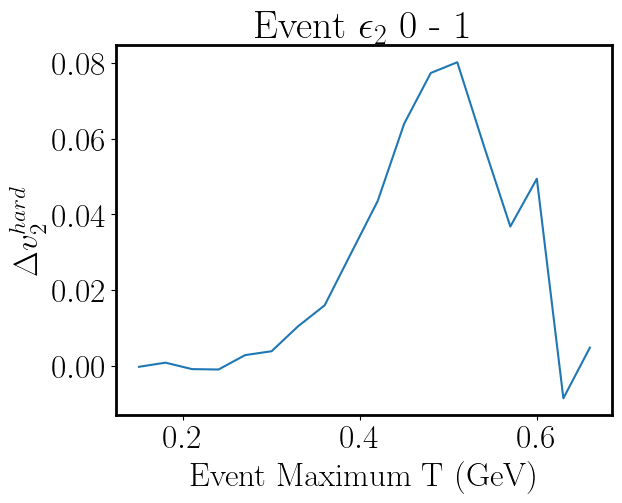

In [50]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0
e_max = 1

e2_cut = (v2results['e_2'] < e_max) & (v2results['e_2'] > e_min) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values0 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
    # try:
    #     val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
    # except:
    #     val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])

    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values0 = np.append(values0, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values0)


#plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('$\Delta v_2^{hard}$')
plt.savefig("delta_v2_hard_hist.png", bbox_inches="tight")
print(T_bins, values0)

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99] [        nan         nan         nan         nan         nan -0.0002628
  0.00143622 -0.00099059 -0.00078323 -0.00067268  0.00048588  0.00070924
  0.00060784 -0.00272903  0.00325268  0.01009833  0.03150469  0.02938547
  0.02489382  0.01304311  0.03044482 -0.00860817  0.00477638         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]


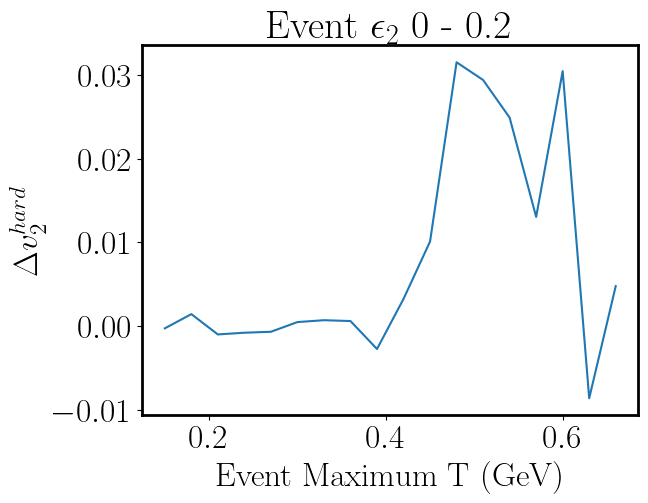

In [54]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0
e_max = 0.2

e2_cut = (v2results['e_2'] < e_max) & (v2results['e_2'] > e_min) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values1 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
   
    # try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])

    # print(results[e2_cut & T_cut]['aco'])
   
    values1 = np.append(values1, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values1)


#plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('$\Delta v_2^{hard}$')
print(T_bins, values1)

Text(0, 0.5, '$\\Delta v_2^{hard}$')

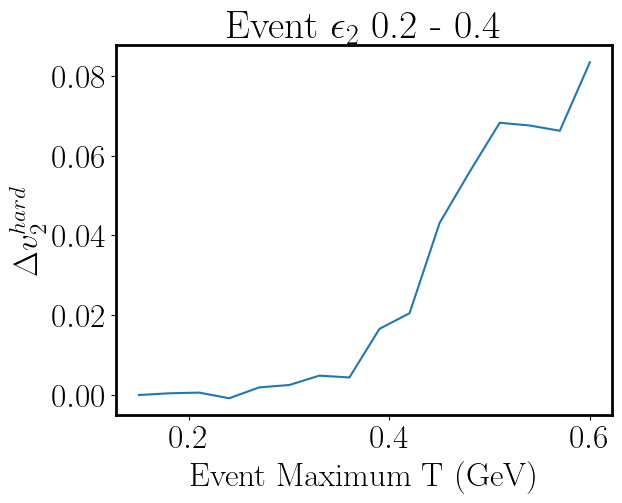

In [65]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.2
e_max = 0.4

e2_cut = (v2results['e_2'] < e_max) & (v2results['e_2'] > e_min) # & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values2 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
    # try:
    #     val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    # except:
    #     val = np.nan

    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    # print(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    # print("end")
    values2 = np.append(values2, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values2)


# plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('$\Delta v_2^{hard}$')
# print(T_bins, values)

Text(0, 0.5, '$\\Delta v_2^{hard}$')

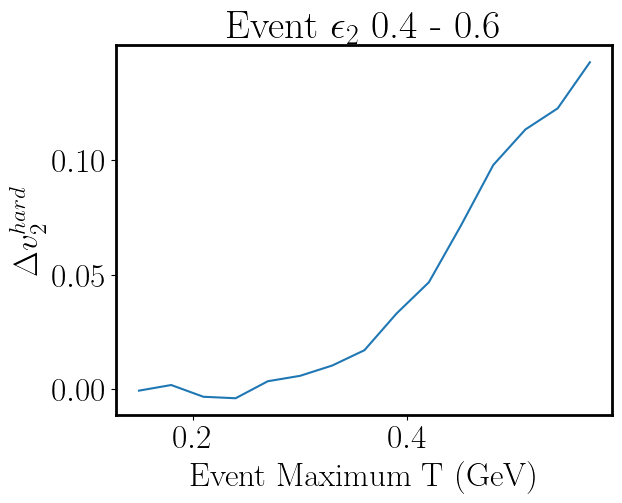

In [66]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.4
e_max = 0.6

e2_cut = (v2results['e_2'] < e_max) & (v2results['e_2'] > e_min) # & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values3 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
    # try:
    #     val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    # except:
    #     val = np.nan

    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    # val = np.mean(results[e2_cut & T_cut]['aco'])
    # print(results[e2_cut & T_cut]['aco'])
    # print("end")
    values3 = np.append(values3, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values3)


# plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('$\Delta v_2^{hard}$')
# print(T_bins, values)

[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3  0.33 0.36 0.39
 0.42 0.45 0.48 0.51 0.54 0.57 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.81
 0.84 0.87 0.9  0.93 0.96 0.99] [        nan         nan         nan         nan         nan  0.00076373
 -0.0006357   0.00045239  0.00060194  0.00492282  0.00493175  0.01692777
  0.02599265  0.04333718  0.06394889  0.09208178  0.11744721  0.12591775
  0.16840652         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan]


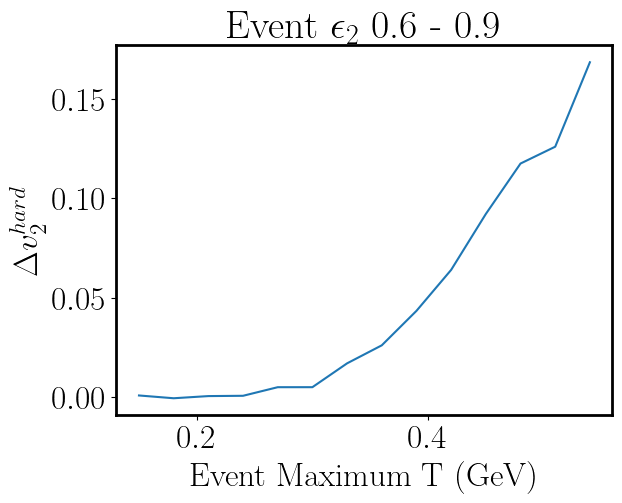

In [67]:
#Acoplanarities as a function of T (added Drift selection cut )
e_min = 0.6
e_max = 0.9

e2_cut = (v2results['e_2'] < e_max) & (v2results['e_2'] > e_min) # & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.03
values4 = np.array([])
T_bins = np.arange(0, 1, bin_width)
for T in T_bins:
    T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
    # try:
    #     val = np.average(results[e2_cut & T_cut]['aco'], weights=results[e2_cut & T_cut]['weight'])
    # except:
    #     val = np.nan

    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    # print(results[e2_cut & T_cut]['aco']) #mean
    # print("end")
    values4 = np.append(values4, val)

fig, axis = plt.subplots(1)
axis.plot(T_bins, values4)


#plt.ylim(0,0.085)
axis.set_title(r'Event $\epsilon_2$ {} - {}'.format(e_min, e_max))
axis.set_xlabel('Event Maximum T (GeV)')
axis.set_ylabel('$\Delta v_2^{hard}$')
print(T_bins, values4)

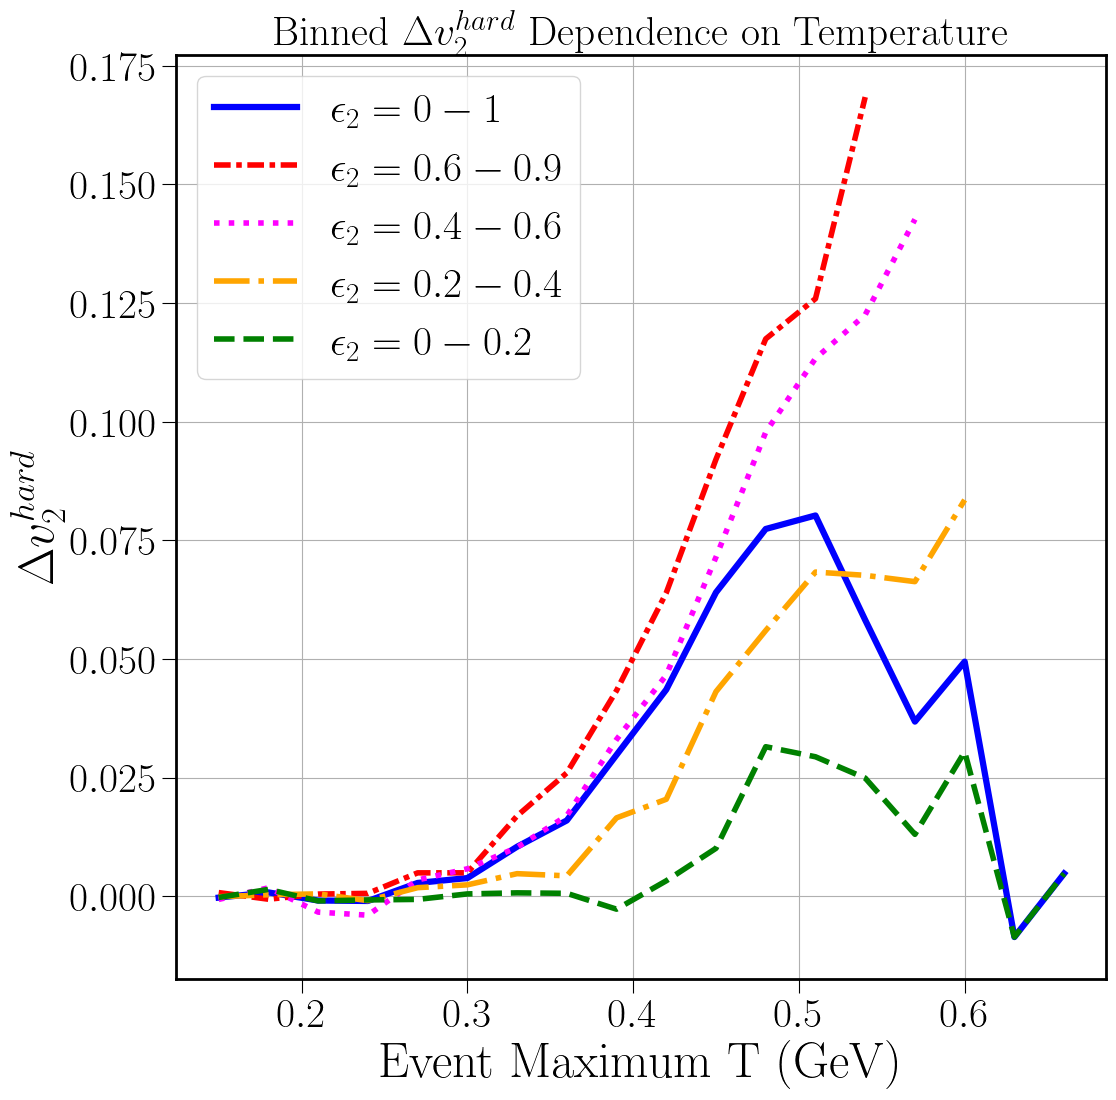

In [134]:
#Acoplanarity = func(T) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)



ax.set_title(r'Binned $\Delta v_2^{hard}$ Dependence on Temperature', fontsize= 30)
ax.set_xlabel('Event Maximum T (GeV)', fontsize= 36)
ax.set_ylabel('$\Delta v_2^{hard}$', fontsize= 36)

ax.plot(T_bins, values0, linewidth = 4.5, color='b', label="$\epsilon_2 = 0 - 1$") #
ax.plot(T_bins, values4, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$\epsilon_2 = 0.6 - 0.9$") #
ax.plot(T_bins, values3, linewidth = 4, color='magenta', ls= 'dotted', label="$\epsilon_2 = 0.4 - 0.6$") #
ax.plot(T_bins, values2, linewidth = 4, color='orange', ls= 'dashdot', label="$\epsilon_2 = 0.2 - 0.4$") #
ax.plot(T_bins, values1, linewidth = 4, color='g', ls= 'dashed', label="$\epsilon_2 = 0 - 0.2$") #

ax.tick_params(axis='both',which='major',labelsize=30,length=10)
ax.grid()
ax.legend(fontsize=30)
# ax.set_xlim(0,500)
# plt.ylim(0,0.09)

plt.savefig("delta_v2_hard_mean_funcT_ecc2_all.png", bbox_inches="tight")
# plt.savefig("delta_v2_hard_mean_funcT_ecc2_0-1.png", bbox_inches="tight")

# print(T_bins, values)

[0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96] [0.00260016 0.00241257 0.01269523 0.02778194 0.03498662 0.04406254
 0.05437556 0.06168583 0.06553312 0.05865278 0.06056939 0.04898616
 0.03451367 0.03084666 0.01738114 0.00442131 0.00288588]
(17,)
(17,)


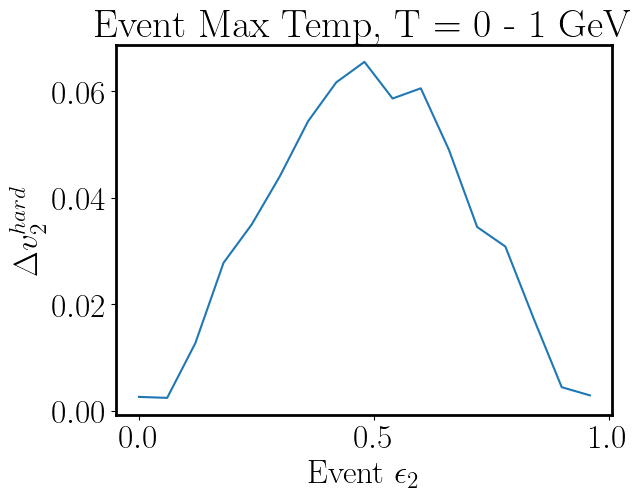

In [97]:
#Aco = func(e_2)

# e2_cut = (results['e2'] < e_max) & (results['e2'] > e_min) & (results['K_F_DRIFT'] == 0.75)
T_cut = (v2results['Tmax'] > 0) & (v2results['Tmax'] < 1) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06
values5 = np.array([])
e2_bins = np.arange(0, 1, bin_width)

for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values5 = np.append(values5, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values5)

# plt.ylim(0,0.08)
axis.set_title('Event Max Temp, T = 0 - 1 GeV')
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

print(e2_bins, values5)
print(np.shape(e2_bins))
print(np.shape(values5))

Text(0, 0.5, '$\\Delta v_2^{hard}$')

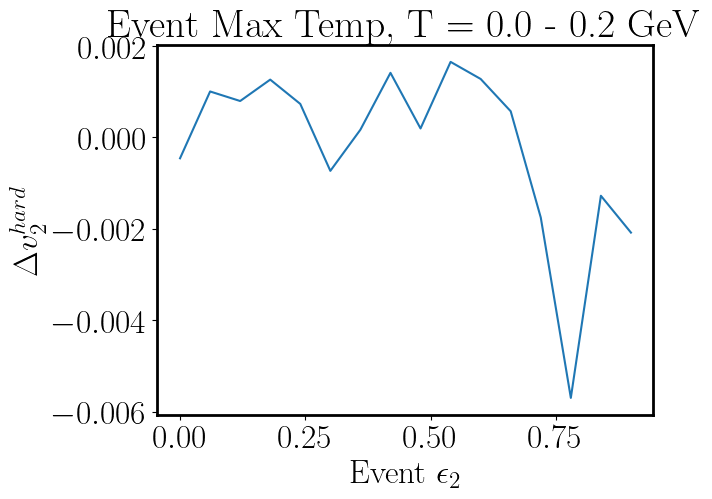

In [98]:
t_min = 0.0 #GeV
t_max = 0.2 #GeV
T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values6 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values6 = np.append(values6, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values6)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

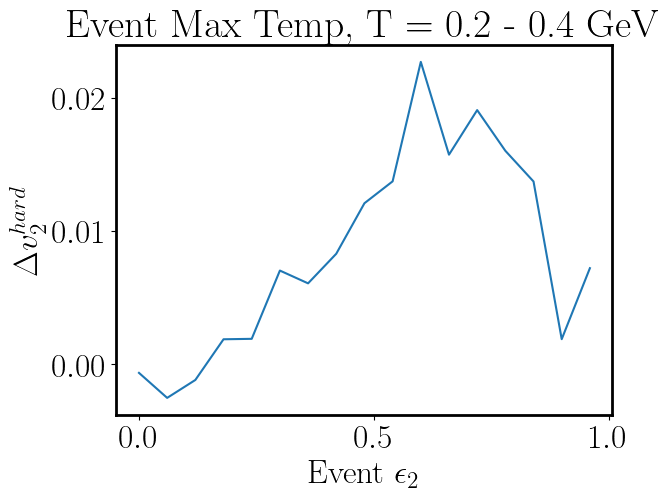

In [99]:
t_min = 0.2 #GeV
t_max = 0.4 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values7 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values7 = np.append(values7, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values7)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

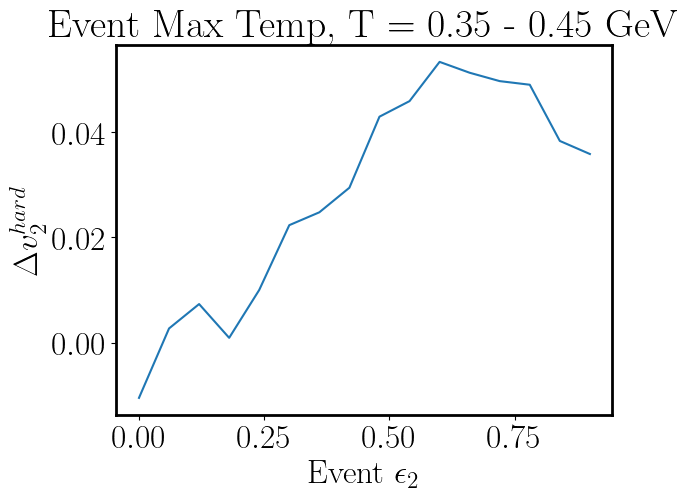

In [152]:
t_min = 0.35 #GeV
t_max = 0.45 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values7a = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values7a = np.append(values7a, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values7a)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

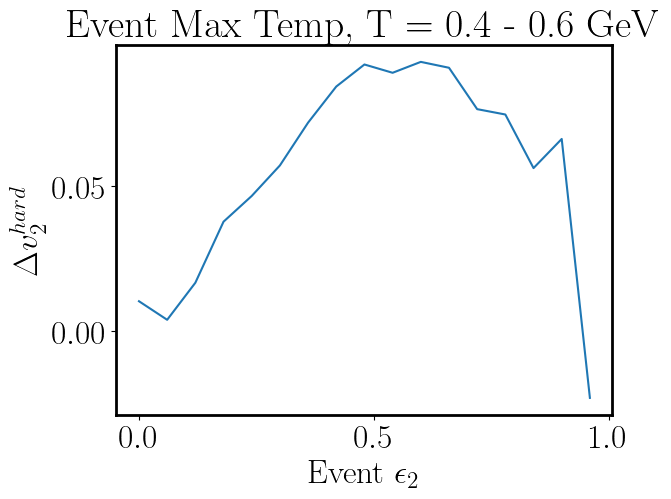

In [100]:
t_min = 0.4 #GeV
t_max = 0.6 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values8 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values8 = np.append(values8, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values8)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

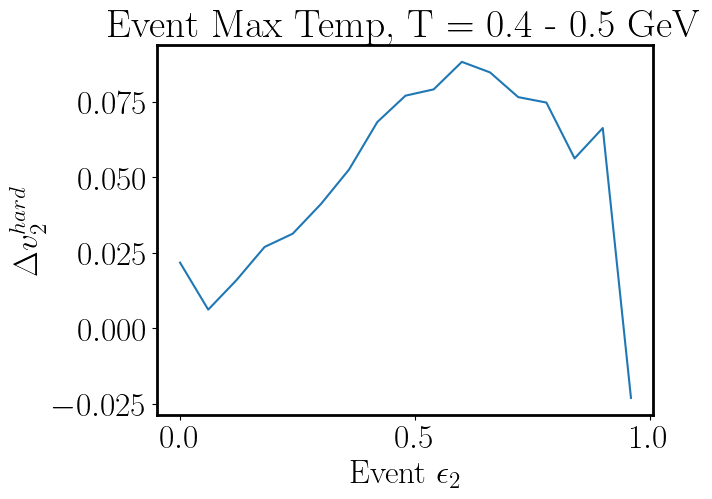

In [148]:
t_min = 0.4 #GeV
t_max = 0.5 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values8a = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values8a = np.append(values8a, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values8a)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

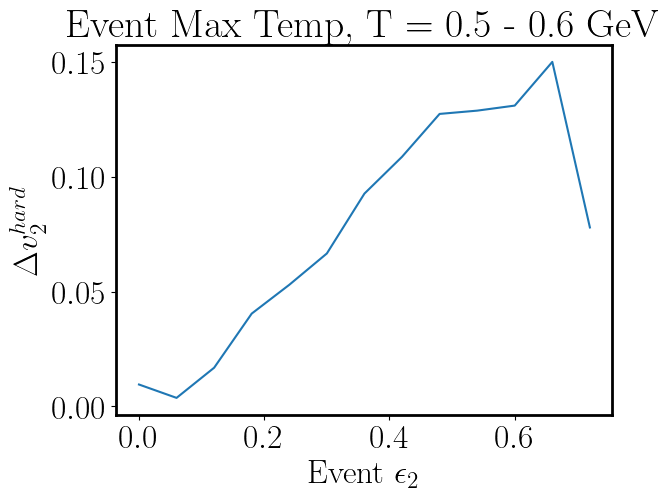

In [149]:
t_min = 0.5 #GeV
t_max = 0.6 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values8b = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values8b = np.append(values8b, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values8b)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

Text(0, 0.5, '$\\Delta v_2^{hard}$')

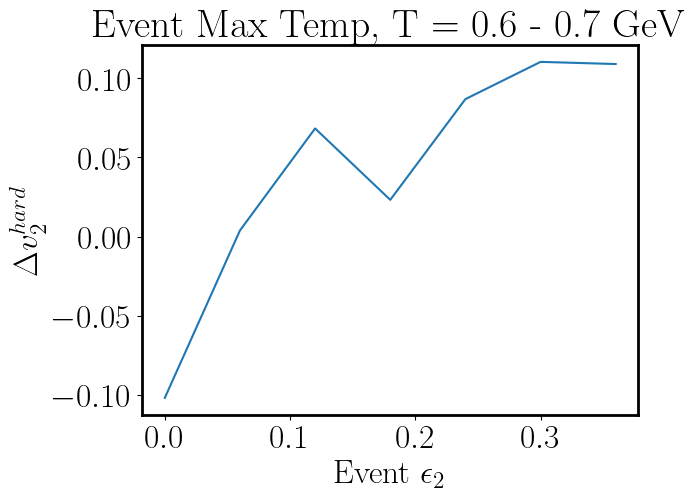

In [136]:
t_min = 0.6 #GeV
t_max = 0.7 #GeV

T_cut = (v2results['Tmax'] > t_min) & (v2results['Tmax'] < t_max) #& (results['K_F_DRIFT'] == 0.75)
bin_width = 0.06

values9 = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (v2results['e_2'] < e2 + bin_width/2) & (v2results['e_2'] > e2 - bin_width/2)
    # T_cut = (v2results['Tmax'] < T + bin_width/2) & (v2results['Tmax'] > T - bin_width/2)
    # print("begin")
#     try:
#         val = np.average(v2results[e2_cut & T_cut]['delta_v_2_hard'], weights=v2results[e2_cut & T_cut]['weight'])
#     except:
#         val = np.nan
    
    val = np.mean(v2results[e2_cut & T_cut]['delta_v_2_hard'])
    values9 = np.append(values9, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values9)

# plt.ylim(0,0.08)
axis.set_title(r'Event Max Temp, T = {} - {} GeV'.format(t_min, t_max)) 
axis.set_xlabel(r'Event $\epsilon_2$')
axis.set_ylabel('$\Delta v_2^{hard}$')

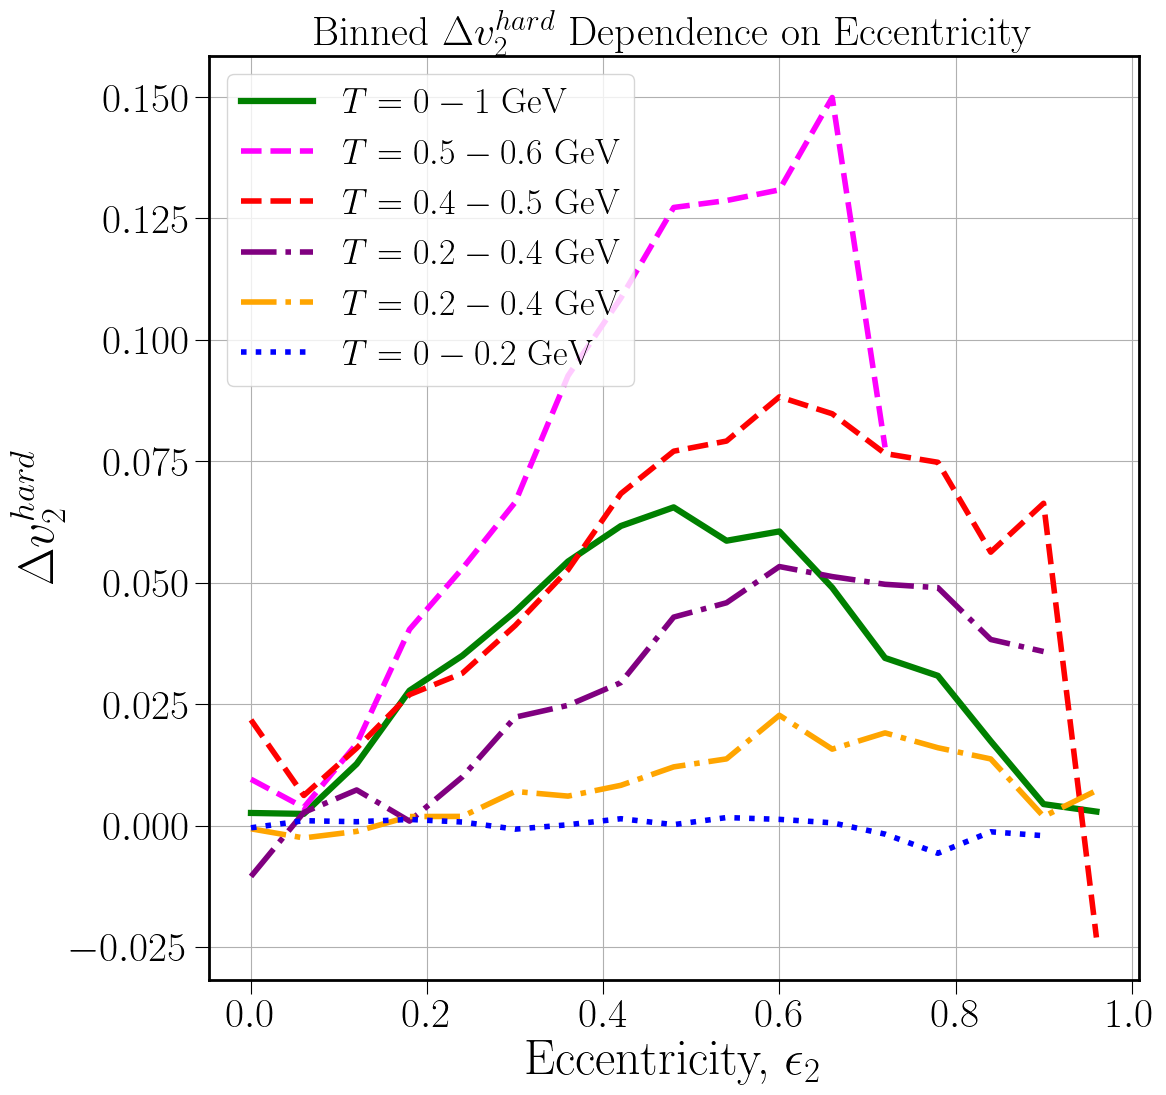

In [153]:
#Acoplanarity = func(e2) Plot


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

# #TeX up labels and text:

# plt.rc("text", usetex=True)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
# plt.rc('font', size=24) 
# plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
# plt.rc('axes', linewidth=2)



ax.set_title(r'Binned $\Delta v_2^{hard}$ Dependence on Eccentricity', fontsize= 30)
ax.set_xlabel('Eccentricity, $\epsilon_2$', fontsize= 36)
ax.set_ylabel('$\Delta v_2^{hard}$', fontsize= 36)

ax.plot(e2_bins, values5, linewidth = 4.5, color='g', label="$T = 0 - 1$ GeV") #
# ax.plot(e2_bins, values9, linewidth = 4, color='r', ls= (0,(3,1,1,1)), label="$T = 0.6 - 1$ GeV") #
# ax.plot(e2_bins, values8, linewidth = 4, color='magenta', ls= 'dashed', label="$T = 0.4 - 0.6$ GeV") #
ax.plot(e2_bins, values8b, linewidth = 4, color='magenta', ls= 'dashed', label="$T = 0.5 - 0.6$ GeV") #
ax.plot(e2_bins, values8a, linewidth = 4, color='r', ls= 'dashed', label="$T = 0.4 - 0.5$ GeV") #

ax.plot(e2_bins, values7a, linewidth = 4, color='purple', ls= 'dashdot', label="$T = 0.2 - 0.4$ GeV") #
ax.plot(e2_bins, values7, linewidth = 4, color='orange', ls= 'dashdot', label="$T = 0.2 - 0.4$ GeV") #
ax.plot(e2_bins, values6, linewidth = 4, color='b', ls= 'dotted', label="$T = 0 - 0.2$ GeV") #

ax.tick_params(axis='both',which='major',labelsize=30,length=10)
ax.grid()
ax.legend(fontsize=26)

# ax.set_xlim(0,500)
# plt.ylim(0,0.08)
# plt.savefig("delta_v2_hard_mean_func_ecc2_Tmax_all.png", bbox_inches="tight")
# plt.savefig("delta_v2_hard_mean_func_ecc2_Tmax_0-1GeV.png", bbox_inches="tight")
# print(T_bins, values)

C:\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


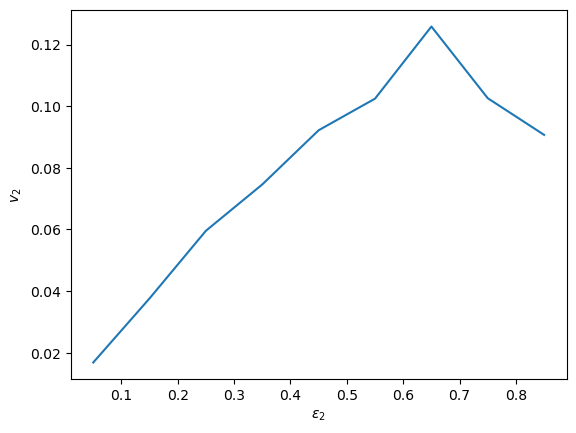

In [117]:
fig, axis = plt.subplots()
axis.set_ylabel(r'$v_2$') #, linewidth=4
axis.set_xlabel(r'$\epsilon_2$') #, rotation=0)
v2_array = np.array([])
e2_bins = np.arange(0, 1.1, 0.1)
e2_bin_centers = (e2_bins[1:] + e2_bins[0:-1])/2
for i in np.arange(0, len(e2_bin_centers)):
    e2_min = e2_bins[i]
    e2_max = e2_bins[i+1]
    df = results[(results['e2'] > e2_min) & (results['e2'] < e2_max)]
    v2 = np.mean(df['v2'].to_numpy())
    v2_array = np.append(v2_array, v2)

axis.plot(e2_bin_centers, v2_array)#, marker='+')
#axis.set_xlim(0.1, 0.65)

#np.savez('mean_energy_loss/g2.5_quarks_EL_deltaE_o_E.npz', pt=pt_bin_centers, el=avg_array)

#axis.legend()

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

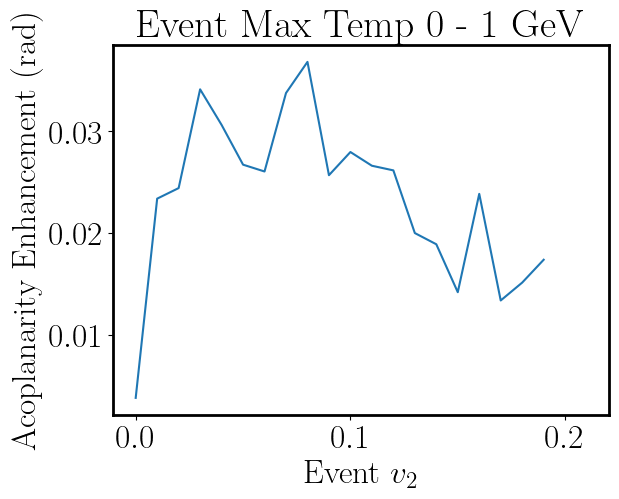

In [114]:

T_cut = (results['Tmax_event'] > 0) & (results['Tmax_event'] < 1) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.01

values = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['v2'] < e2 + bin_width/2) & (results['v2'] > e2 - bin_width/2)
    val = np.mean(results[e2_cut & T_cut]['aco'])
    values = np.append(values, val)


fig, axis = plt.subplots(1)
axis.plot(e2_bins, values)
axis.set_title('Event Max Temp 0 - 1 GeV')
axis.set_xlabel(r'Event $v_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

Text(0, 0.5, 'Acoplanarity Enhancement (rad)')

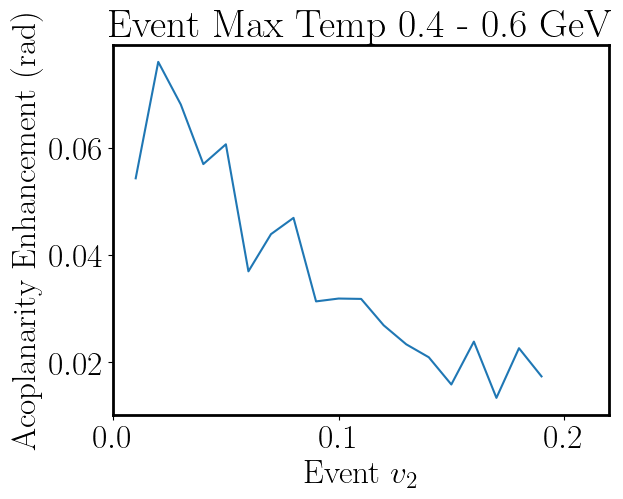

In [115]:

T_cut = (results['Tmax_event'] > 0.4) & (results['Tmax_event'] < 0.6) & (results['K_F_DRIFT'] == 0.75)
bin_width = 0.01

values = np.array([])
e2_bins = np.arange(0, 1, bin_width)
for e2 in e2_bins:
    e2_cut = (results['v2'] < e2 + bin_width/2) & (results['v2'] > e2 - bin_width/2)
    val = np.mean(results[e2_cut & T_cut]['aco'])
    values = np.append(values, val)

fig, axis = plt.subplots(1)
axis.plot(e2_bins, values)
axis.set_title('Event Max Temp 0.4 - 0.6 GeV')
axis.set_xlabel(r'Event $v_2$')
axis.set_ylabel('Acoplanarity Enhancement (rad)')

# v_2

In [187]:
v2_result = pd.read_parquet('2024.08.03_acoplanarities\\partonic_hard_v2_dist.parquet')

In [188]:
v2_result

,delta_v_2_hard,v_2_hard,v_2_hard_el,mult,Tmax,e_2,v_2_soft
index,,,,,,,
0,0.000401,0.009681,0.009280,0.422367,0.169434,0.197283,0.034173
1,-0.165775,-0.105329,0.060446,3612.519489,0.567813,0.054870,0.010224
2,0.120505,0.128056,0.007551,1196.372821,0.515834,0.448477,0.129014
3,0.028350,0.030475,0.002125,35.429145,0.327165,0.402214,0.054994
4,0.101077,0.112675,0.011598,79.053864,0.374367,0.439969,0.075464
...,...,...,...,...,...,...,...
495,0.115586,0.129777,0.014191,179.216861,0.398569,0.711851,0.164501
496,0.110289,0.125470,0.015182,2853.116584,0.580300,0.149692,0.041247
497,0.113486,0.114722,0.001236,719.886179,0.494847,0.448559,0.108089
